# Titanic Data Analysis

## Introduction

This report is a data analysis from disaster using the Titanic Data from the Kaggle dataset. The purpose of this analysis is to practice the concept of data analysis using real world dataset to answer some question. For this analysis, I will be using Python and four data analysis libraries: Pandas, Numpy, Matplotlib, Scipy, and Seaborn.

## Questions

"One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class." - https://www.kaggle.com/c/titanic

From the dataset description page in Kaggle, we can see that they state women, children, and the upper-class have higher survive chance than men, adult, and the lower-class. However, how do they come up with this assumption? I will test their assumption by answering the following question using the dataset they provided:

1. **Did higher social-economic status caused a higher survival rate?**
2. **Did women have higher chance to survival than adult male?**
3. **Did age, regardless of sex, determine your chances of survival?**

## Data Wrangling

Before any data analysis, it is crucial to investigate and clean up the dataset(s) we are going to use. There are 4 data wrangling steps we should perform before we are going to answer the above questions.

### 1. Dataset Description

(from https://www.kaggle.com/c/titanic)
* survival: Survival (0 = No; 1 = Yes)
* pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name: Name
* sex: Sex
* age: Age
* sibsp: Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard
* ticket: Ticket Number
* fare: Passenger Fare
* cabin: Cabin
* embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Special Notes:**
* Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
* Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.
* Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent: Mother or Father of Passenger Aboard Titanic
* Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

### 2. Load Data from CSVs

I will import all the necessary libraries at the begining, so no need to add more libraries later.

In [1]:
# Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns

# Set style for all graphs
sns.set_style("dark")

## Read in the data from titanic-data.csv 
## and store the results in the below variable.
## Then look at the first row.
titanicData = pd.read_csv('titanic-data.csv')

In [2]:
# Print the first few records to review data and format
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Print the last few records to review data and format
titanicData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Note**: Some values for Age are NaN (no a number or missing), while ticket and cabin values are alphanumeric and also missing values with NaN. Based on the questions I am going to solve, we will not require either Ticket's or Cabin's data.

### 3. Data Cleanup

Since I will be analysing the dataset from a macro point of view, I don't need the detail of each singel passangers. From the record above, we can observe that there are some columns that I won't need to answer my questions. Therefore, I'll be removing these columns. This will reduce the number of columns and help me to implove the analysis performance of the dataset.
* **PassengerId**
* **Name**
* **Ticket**
* **Cabin**
* **Fare**
* **Embarked**

I'll take 3 steps to cleanup my dataset
1. Identify and remove any duplicate entries
2. Remove unnecessary columns
3. Fix missing data issue and data format issues

**Step 1 - Remove duplicate entries**

In [4]:
# Identify and remove duplicate entries
titanicDataDuplicates = titanicData.duplicated()
print('Number of duplicate entries is/are {}'.format(titanicDataDuplicates.sum()))

Number of duplicate entries is/are 0


**duplicated()** is a function that come with Panda. It will return a new dataset that contain duplicated data from the given dataset. This test indicated that there is not duplicates entires exist in the titanic dataset.

**Step 2 - Remove unnecessary columns**

Columns (PassengerId, Name, Ticket, Cabin, Fare, Embarked) will be removed

In [5]:
# Create new dataset without unwanted columns
titanicDataCleaned = titanicData.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)

# Print the first few records to review data in the new titanicDataCleaned variable
titanicDataCleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


**drop()** is a function that come with Panda. It will return a new object with labels in requested axis removed.

**Step 3 - Fix any missing or data format issues**

A data is missing from a row indicate that the cell in that row is either empty/None or contain NAN

In [6]:
# Calculate number of missing values
titanicDataCleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

**isnull()**  is a function that come with Panda. It will detect missing values (NaN in numeric arrays, None/NaN in object arrays). From this analysis, we observed that the dataset are missing some passanger Age data.

In [7]:
# Review some of the missing Age data
missingAgeBool = pd.isnull(titanicDataCleaned['Age'])
titanicDataCleaned[missingAgeBool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [8]:
# Determine number of males and females with missing age values
missingAgeFemale = titanicDataCleaned[missingAgeBool]['Sex'] == 'female'
missingAgeMale = titanicDataCleaned[missingAgeBool]['Sex'] == 'male'

print('Number for females and males with age missing are {} and {} respectively'.format(
missingAgeFemale.sum(),missingAgeMale.sum()))

Number for females and males with age missing are 53 and 124 respectively


In [9]:
# Taking a look at the datatypes
titanicDataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


**info()** is a function that come with Panda. It will print out the summary of a given DataFrame.

The missing Age data will affect the second question about the relationship between age (regardless of sex) and the chances of survival. However, the graphs and summations shouldn't be a problem since they will be treated as zero(0). However, 177 is roughly 20% of our 891 sample dataset which seems like a lot to discount. Also, this needs to be accounted for if reviewing descriptive stats such as mean age.

### 4. Data Exploration and Visualization

In [10]:
# Looking at some typical descriptive statistics
titanicDataCleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


**describe()** is a function that come with Panda. It will generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [11]:
# Age min at 0.42 looks a bit weird so give a closer look
titanicDataCleaned[titanicDataCleaned['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


In [12]:
# Taking a look at some survival rates for babies
youngestToSurvive = titanicDataCleaned[titanicDataCleaned['Survived'] == True]['Age'].min()
youngestToDie = titanicDataCleaned[titanicDataCleaned['Survived'] == False]['Age'].min()
oldestToSurvive = titanicDataCleaned[titanicDataCleaned['Survived'] == True]['Age'].max()
oldestToDie = titanicDataCleaned[titanicDataCleaned['Survived'] == False]['Age'].max()

print('Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngestToSurvive, youngestToDie, oldestToSurvive, oldestToDie))

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


Data description states that Age can be fractional - Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5 - Therefore, 0.42 appears to be expected and normal data


## Question 1

Did higher social-economic status caused a higher survival rate?

In [13]:
# Returns survival rate/percentage of sex and class
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    groupedByTotal = titanicDataCleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    groupedBySurvivedSex = titanicDataCleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survivedSexPercentage = (groupedBySurvivedSex / groupedByTotal * 100).round(2)
    
    return survivedSexPercentage

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
-----
Class 1 - female survival rate: 96.81%
Class 1 - male survival rate: 36.89%
-----
Class 2 - female survival rate: 92.11%
Class 2 - male survival rate: 15.74%
-----
Class 3 - female survival rate: 50.0%
Class 3 - male survival rate: 13.54%


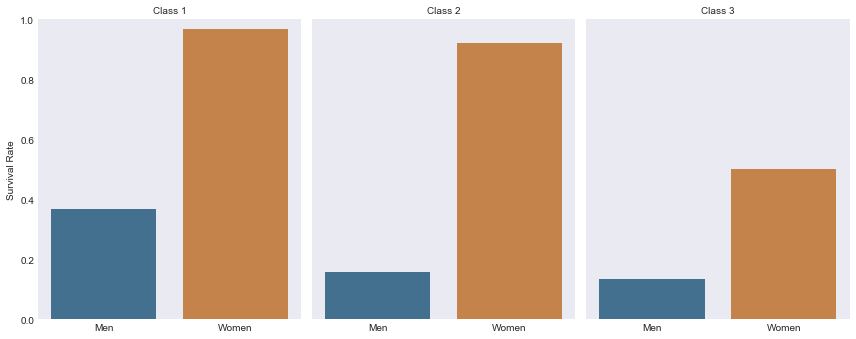

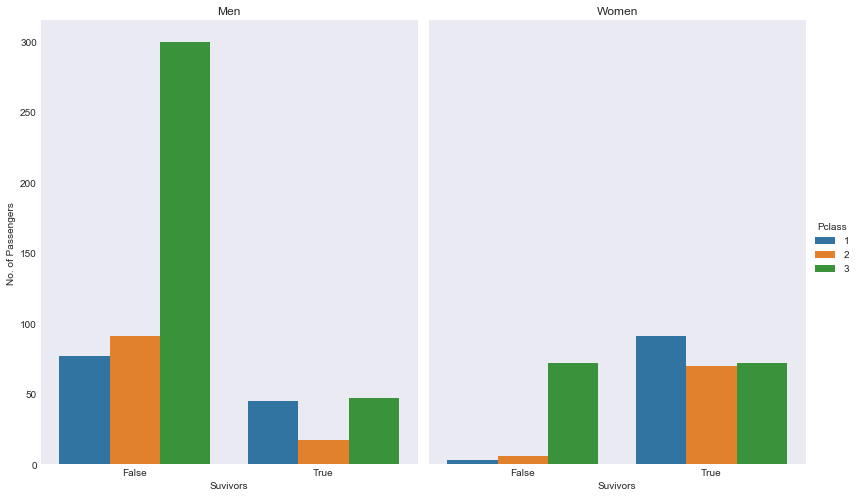

In [14]:
# Get the actual numbers grouped by class, suvival and sex
groupedbyClassSurvivedSize = titanicDataCleaned.groupby(['Pclass','Survived','Sex']).size()

# Print - Grouped by class, survival and sex
print(groupedbyClassSurvivedSize)
print('-----')
print('Class 1 - female survival rate: {}%'.format(survival_rate(1,'female')))
print('Class 1 - male survival rate: {}%'.format(survival_rate(1,'male')))
print('-----')
print('Class 2 - female survival rate: {}%'.format(survival_rate(2,'female')))
print('Class 2 - male survival rate: {}%'.format(survival_rate(2,'male')))
print('-----')
print('Class 3 - female survival rate: {}%'.format(survival_rate(3,'female')))
print('Class 3 - male survival rate: {}%'.format(survival_rate(3,'male')))

# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanicDataCleaned, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanicDataCleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based on the raw numbers it would appear as though passengers in Class 3 had a similar survival rate as those from Class 1 with **119 and 136 passengers surviving respectively**. However, looking at the percentages of the overall passengers per class and the total numbers across each class, it can be assumed that **a passenger from Class 1 is about 2.5x times more likely to survive than a passenger in Class 3**.

Social-economic standing was a factor in survival rate of passengers. 
* Class 1: **62.96% **
* Class 2: **47.28%**
* Class 3: **24.24%**

## Question 2

Did women have higher chance to survival than adult male?

In [15]:
# Let us first identify and get rid of records with missing Age
print('Number of men and woman with age missing are {} and {} respectively'.format(
    missingAgeFemale.sum(),missingAgeMale.sum()))

# Drop the NaN values. Calculations will be okay with them (seen as zero) but will throw off averages and counts
titanicDataAgeCleaned = titanicDataCleaned.dropna()

# Create Cateogry column and categorize people
titanicDataAgeCleaned.loc[
    (titanicDataAgeCleaned['Sex'] == 'female'),
    'Category'] = 'Woman'

titanicDataAgeCleaned.loc[
    (titanicDataAgeCleaned['Sex'] == 'male'),
    'Category'] = 'Man'

# Get the totals grouped by Men and Women, and by survival
print(titanicDataAgeCleaned.groupby(['Category','Survived']).size())

Number of men and woman with age missing are 53 and 124 respectively
Category  Survived
Man       0           360
          1            93
Woman     0            64
          1           197
dtype: int64


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


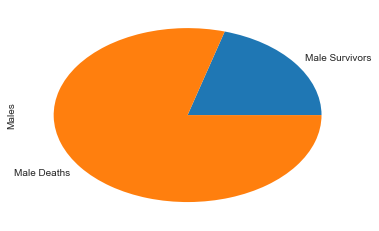

In [16]:
# Created variable to store male and female survive rate
numMaleSurvivors = titanicDataAgeCleaned.groupby(['Survived','Sex']).size()[1,'male']
numMaleNonSurvivors = titanicDataAgeCleaned.groupby(['Survived','Sex']).size()[0,'male']
numFemaleSurvivors = titanicDataAgeCleaned.groupby(['Survived','Sex']).size()[1,'female']
numFemaleNonSurvivors = titanicDataAgeCleaned.groupby(['Survived','Sex']).size()[0,'female']

#Plotting Survivors/Deaths by Males
pd.Series([numMaleSurvivors, numMaleNonSurvivors], 
          index=['Male Survivors', 'Male Deaths'],
          name='Males').plot(kind='pie')

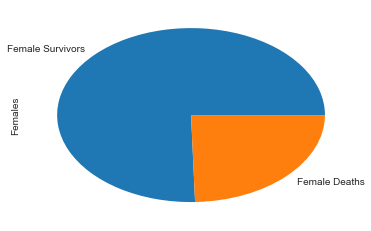

In [17]:
# Plotting Survivors/Deaths by Females
pd.Series([numFemaleSurvivors, numFemaleNonSurvivors], 
          index=['Female Survivors', 'Female Deaths'],
          name='Females').plot(kind='pie')

Overall, women have higher survive rate than men. The graphs tends to support the idea that "laddy first" possibly played a role in the survival of a number of people.

## Question 3

Did age, regardless of sex, determine your chances of survival?

Total number of survivors 290 
Total number of non survivors 424 
Total number of Children (age < 15) 78 
Total number of Adult with (age >= 15) 636 
Category  Survived
Adult     0           391
          1           245
Children  0            33
          1            45
dtype: int64


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


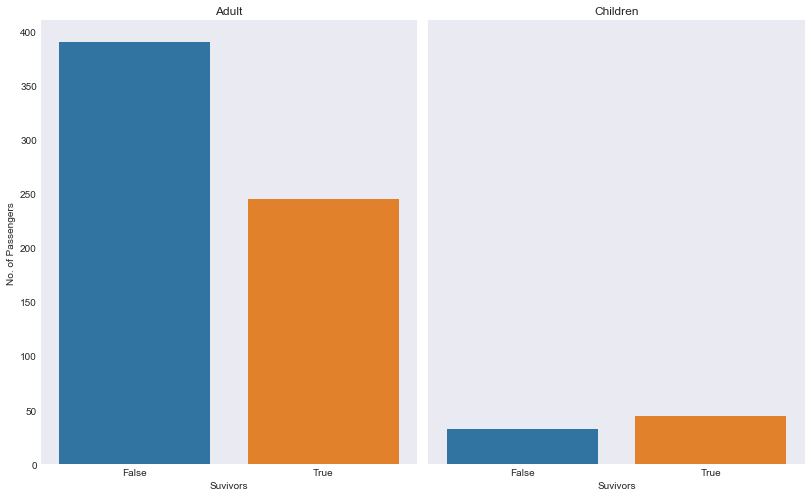

In [18]:
# Find total count of survivors and those who didn't
numberSurvived = titanicDataAgeCleaned[titanicDataAgeCleaned['Survived'] == True]['Survived'].count()
numberDied = titanicDataAgeCleaned[titanicDataAgeCleaned['Survived'] == False]['Survived'].count()
numberChildren = titanicDataAgeCleaned[titanicDataAgeCleaned['Age'] < 15]['Age'].count()
numberAdult = titanicDataAgeCleaned[titanicDataAgeCleaned['Age'] >= 15]['Age'].count()


# Display a few raw totals
print('Total number of survivors {} \n\
Total number of non survivors {} \n\
Total number of Children (age < 15) {} \n\
Total number of Adult with (age >= 15) {} ' \
.format(numberSurvived, numberDied, numberChildren, numberAdult))

# Create Cateogry column and categorize people
titanicDataAgeCleaned.loc[
    (titanicDataAgeCleaned['Age'] < 15),
    'Category'] = 'Children'

titanicDataAgeCleaned.loc[
    (titanicDataAgeCleaned['Age'] >= 15),
    'Category'] = 'Adult'

# Get the totals grouped by Children and Adult, and by survival
print(titanicDataAgeCleaned.groupby(['Category','Survived']).size())

# Graph - Compare survival count between Men and Women
g = sns.factorplot('Survived', col='Category', data=titanicDataAgeCleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True'])
)

titles = ['Adult', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based on the above boxplot and calculated data, it would appear that:
* Regardless of sex and class, **the servive rate of Adults are 1/3 chance lower while the survive rate of Children are slightly higher**.
* However, this is based on the assumption that all children are **under 15 years old**, and this might noy be the case in the 1900s.

## Conclusion

The results of the analysis indicate that a female with upper social-economic standing (first class), would give one the best chance of survival during the Titanic tragedy occurred. Sex and social-economic seem to be a major survive factor. While being a man in third class, gave one the lowest chance of survival. Overall, women and children across all classes tend to have a higher survival rate than men in genernal.

**Issues:**
* A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers.